In [1]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
moviedata = pd.read_csv('Final-CLEAN-Dataset.csv',index_col= 0)

# Quantile 25% and 75%
Q1 = moviedata['Runtime'].quantile(0.25)
Q3 = moviedata['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

moviedata = moviedata.drop(moviedata[(moviedata['Runtime'] <= Q1 - 1.5*IQR) | (moviedata['Runtime'] >= Q3 + 1.5*IQR)].index)
moviedata

In [3]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9301 entries, 1 to 20966
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               9301 non-null   object 
 1   Decade              9301 non-null   object 
 2   Age                 9301 non-null   object 
 3   IMDb                9301 non-null   float64
 4   Rotten              9301 non-null   int64  
 5   Availability Score  9301 non-null   int64  
 6   Directors           9301 non-null   object 
 7   Genres              9301 non-null   object 
 8   Country             9301 non-null   object 
 9   Language            9301 non-null   object 
 10  Runtime             9301 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 872.0+ KB


In [4]:
EDA_numeric = pd.DataFrame(moviedata[["IMDb", "Rotten", "Runtime"]])
EDA_numeric

,IMDb,Rotten,Runtime
ID,,,
1,8.8,87,148
2,8.7,87,136
3,8.5,84,149
4,8.5,96,116
5,8.8,97,161
...,...,...,...
20931,7.6,41,60
20937,5.4,40,47
20940,7.4,40,60


In [5]:
EDA_numeric.describe()

,IMDb,Rotten,Runtime
count,9301.000000,9301.000000,9301.000000
mean,5.897592,35.965058,97.795506
std,1.298822,34.177065,22.700990
min,1.000000,0.000000,2.000000
25%,5.100000,0.000000,88.000000
50%,6.100000,39.000000,95.000000
75%,6.800000,65.000000,107.000000
max,9.100000,100.000000,359.000000


KeyError: 0

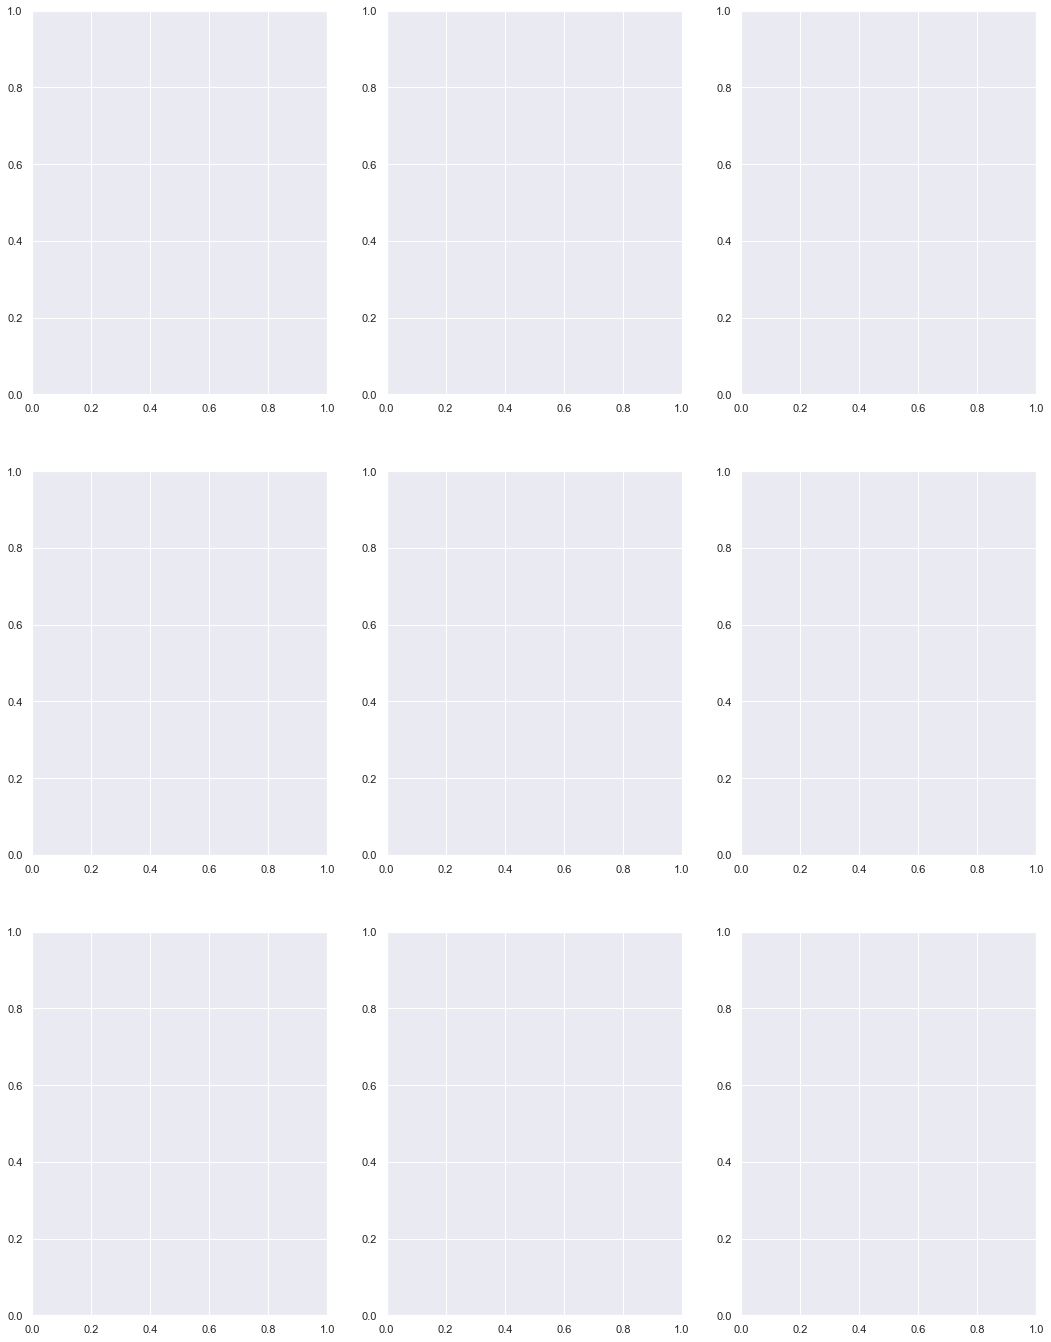

In [8]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 24))

count = 0

sb.boxplot(data = EDA_numeric["IMDb"], orient = "h", ax = axes[count,0])
sb.histplot(data = EDA_numeric["IMDb"], ax = axes[count,1])
sb.violinplot(data = EDA_numeric["IMDb"], orient = "h", ax = axes[count,2])
